# 의사결정나무
주 장점(나무유형머신러닝) : 데이터를 정규화할 필요가 없다. 계속 구분하는것이기 때문
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘

### 문제 정의
서울 지역(구)의 경도와 위도 정보를 사용하여     
임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류해보는 예제

In [40]:
import pandas as pd

label : 서울을 동서남북 4등분한 기준 강동/강서/강남/강북

In [41]:
train_df = pd.read_csv("../Data/seoul_district.csv")
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [42]:
test_df = pd.read_csv('../Data/seoul_dong.csv')
test_df.head() 

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [43]:
train_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [44]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

### 데이터 전처리

In [45]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   district   20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dong       20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [46]:
# 경도와 위도의 평균과 편차
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


> 경도와 위도는 동일한 단위를 사용  
> 의사결정나무는 각 특징을 독립적으로 사용하기 때문에 별다른 전처리 과정이 필요 없다    
*정규화 하면 각 특징이 없어져서 구분을 못한다. 큰일남!*

In [47]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [48]:
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

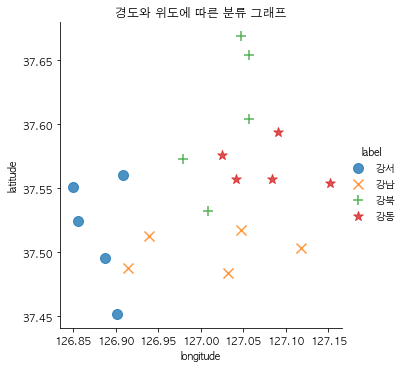

In [49]:
# train_df의 경도와 위도에 해당하는 label을 시각화 하려고 한다.
sns.lmplot(

    'longitude',
    'latitude',
    data= train_df,
    fit_reg=False,
    markers = ['o','x','+','*'],
    scatter_kws={'s':100}, #좌표상의 점의 크기
    hue='label', #대상값

)
plt.title('경도와 위도에 따른 분류 그래프')
plt.show()

### 데이터 다듬기
- train_df 에서 district 제거
- test_df 에서 dong 제거
- X_train = 위도와 경도
- y_train = 라벨
- X_test = 위도와 경도
- y_test = 라벨

In [50]:
# 필요없는 컬럼 삭제
train_df.drop('district' , axis='columns' , inplace= True)
test_df.drop('dong' , axis='columns' , inplace= True)

In [51]:
# 학습 데이터를 문제와 정답으로 분류
X_train = train_df[['longitude','latitude']]
y_train = train_df['label']

In [52]:
# 테스트 데이터를 문제와 정답으로 분류
X_test = test_df[['longitude','latitude']]
y_test = test_df['label']

### 의사결정 나무로 학습시키기 (random_state = 35)

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=35)
clf.fit(X_train, y_train)
print("정답률 : " , clf.score(X_test, y_test))
pred = clf.predict(X_test)
pred

정답률 :  0.95


In [ ]:
# import 하는 다른 방법 @
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_train)

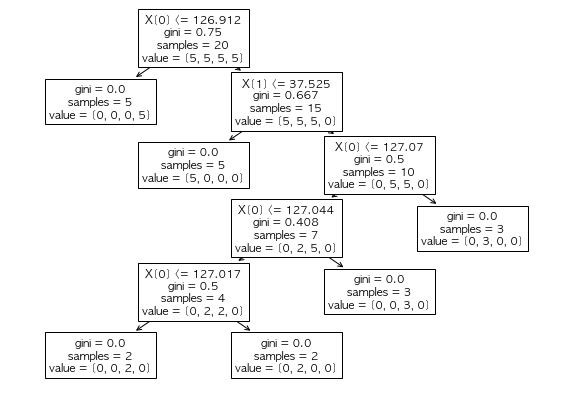

In [62]:
# 의사결정나무 그래프
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(clf)
plt.show()
# gini : 불순도 , 순수한게 좋음 , gini가 0인 곳이 최종 노드
# samples : 데이터 갯수
# value : 데이터 비율

---